# Billionaire Dataset - Exploratory Data Analysis

This notebook explores a dataset of billionaires, examining demographics, wealth distribution, geographical patterns, industry distribution, and relationships with economic factors.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

## 1. Setup and Configuration
Setting up visualization styles and display parameters.

In [5]:
# Set visualization style
plt.style.use('ggplot')
sns.set_palette("Set2")

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

## 2. Data Loading
Loading data and examine basic structure of data.

In [6]:
# Load data
print("Loading dataset...")
df = pd.read_csv('../data/raw/df_ready.csv')

# Display basic information
print(f"\nDataset shape: {df.shape}")
print(f"\nFirst few rows:")
display(df.head())

# Check column names and data types
print("\nColumn info:")
display(df.info())

Loading dataset...

Dataset shape: (2591, 30)

First few rows:


,position,wealth,industry,full_name,age,country_of_residence,city_of_residence,source,citizenship,gender,birth_date,last_name,first_name,residence_state,residence_region,birth_year,birth_month,birth_day,cpi_country,cpi_change_country,gdp_country,g_tertiary_ed_enroll,g_primary_ed_enroll,life_expectancy,tax_revenue,tax_rate,country_pop,country_lat,country_long,continent
0,1,211000,Fashion & Retail,Bernard Arnault & family,74,France,Paris,LVMH,France,M,1949-03-05,Arnault,Bernard,No subdivisions info,No subdivisions info,1949,3,5,110.05,1.1,2715518274227,65.6,102.5,82.5,24.2,60.7,67059887,46.227638,2.213749,Europe
1,2,180000,Automotive,Elon Musk,51,United States,Austin,"Tesla, SpaceX",United States,M,1971-06-28,Musk,Elon,Texas,South,1971,6,28,117.24,7.5,21427700000000,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,North America
2,3,114000,Technology,Jeff Bezos,59,United States,Medina,Amazon,United States,M,1964-01-12,Bezos,Jeff,Washington,West,1964,1,12,117.24,7.5,21427700000000,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,North America
3,4,107000,Technology,Larry Ellison,78,United States,Lanai,Oracle,United States,M,1944-08-17,Ellison,Larry,Hawaii,West,1944,8,17,117.24,7.5,21427700000000,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,North America
4,5,106000,Finance & Investments,Warren Buffett,92,United States,Omaha,Berkshire Hathaway,United States,M,1930-08-30,Buffett,Warren,Nebraska,Midwest,1930,8,30,117.24,7.5,21427700000000,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,North America



Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2591 entries, 0 to 2590
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   position              2591 non-null   int64  
 1   wealth                2591 non-null   int64  
 2   industry              2591 non-null   object 
 3   full_name             2591 non-null   object 
 4   age                   2591 non-null   int64  
 5   country_of_residence  2591 non-null   object 
 6   city_of_residence     2591 non-null   object 
 7   source                2591 non-null   object 
 8   citizenship           2591 non-null   object 
 9   gender                2591 non-null   object 
 10  birth_date            2591 non-null   object 
 11  last_name             2591 non-null   object 
 12  first_name            2591 non-null   object 
 13  residence_state       2591 non-null   object 
 14  residence_region      2591 non-null   object 
 15  birth_y

None

## 3. Data Preprocessing
Checking for missing values, duplicates, and explore summary statistics.

In [7]:
# Check for missing values
print("\nChecking for missing values...")
missing_values = df.isnull().sum()
print("Missing values per column:")
display(missing_values[missing_values > 0])

# Check for duplicates
print("\nChecking for duplicates...")
print(f"Number of duplicate rows: {df.duplicated().sum()}")

# Get summary statistics
print("\nSummary statistics for numerical columns:")
display(df.describe())


Checking for missing values...
Missing values per column:


Series([], dtype: int64)


Checking for duplicates...
Number of duplicate rows: 0

Summary statistics for numerical columns:


,position,wealth,age,birth_year,birth_month,birth_day,gdp_country,g_tertiary_ed_enroll,g_primary_ed_enroll,life_expectancy,tax_revenue,tax_rate,country_pop,country_lat,country_long
count,2591.000000,2591.000000,2591.000000,2591.000000,2591.000000,2591.000000,2.591000e+03,2591.000000,2591.000000,2591.000000,2591.000000,2591.000000,2.591000e+03,2591.000000,2591.000000
mean,1282.913547,4666.190660,65.252798,1957.133925,5.646083,11.882671,1.102966e+13,64.125743,100.232420,78.409101,12.422926,44.548012,4.837733e+08,34.394755,16.383842
std,740.191092,9917.104258,13.055442,13.074254,3.732279,9.941884,9.641891e+12,24.527813,11.966391,3.910509,5.275224,12.212804,5.497567e+08,16.833864,87.389321
min,1.000000,1000.000000,18.000000,1921.000000,1.000000,1.000000,1.044779e+09,0.000000,0.000000,54.300000,0.000000,0.000000,3.112200e+04,-40.900557,-106.346771
25%,636.000000,1500.000000,56.000000,1948.000000,2.000000,1.000000,1.394116e+12,50.600000,100.200000,77.000000,9.500000,36.600000,6.029740e+07,35.861660,-95.712891
50%,1272.000000,2400.000000,65.000000,1957.000000,5.000000,10.000000,5.081770e+12,63.400000,101.800000,78.500000,9.600000,46.100000,3.282395e+08,37.090240,12.567380
75%,1905.000000,4300.000000,75.000000,1966.000000,9.000000,21.000000,2.142770e+13,88.200000,102.600000,81.300000,12.800000,59.200000,1.366418e+09,38.963745,104.195397
max,2540.000000,211000.000000,101.000000,2004.000000,12.000000,31.000000,2.142770e+13,136.600000,142.100000,85.940000,37.200000,106.300000,1.397715e+09,61.924110,174.885971


 ## 4. Demographic Analysis
 Exploring the demographic characteristics of billionaires, including age and gender distribution.

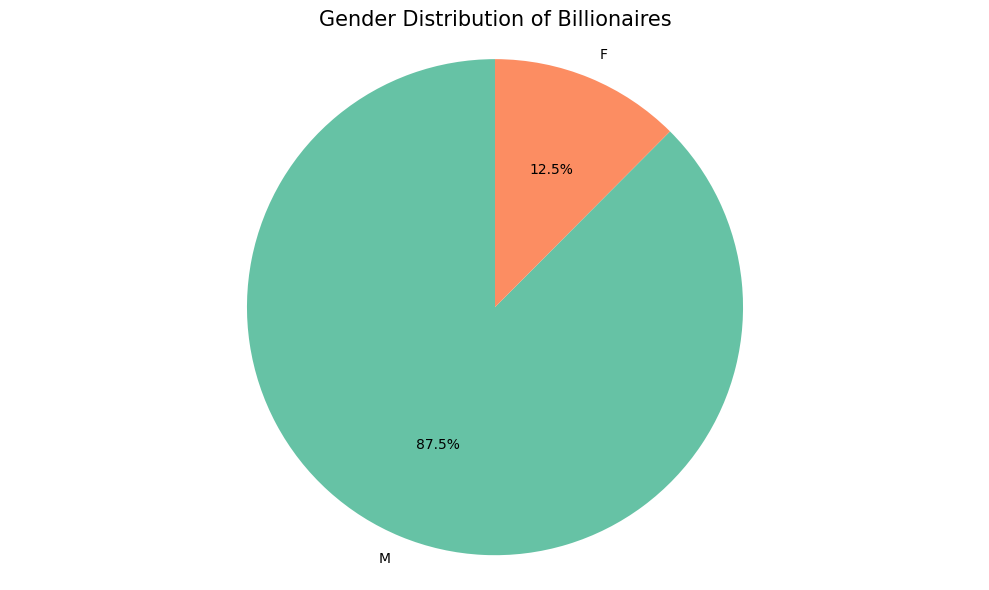


Gender distribution counts:


gender
M    2268
F     323
Name: count, dtype: int64

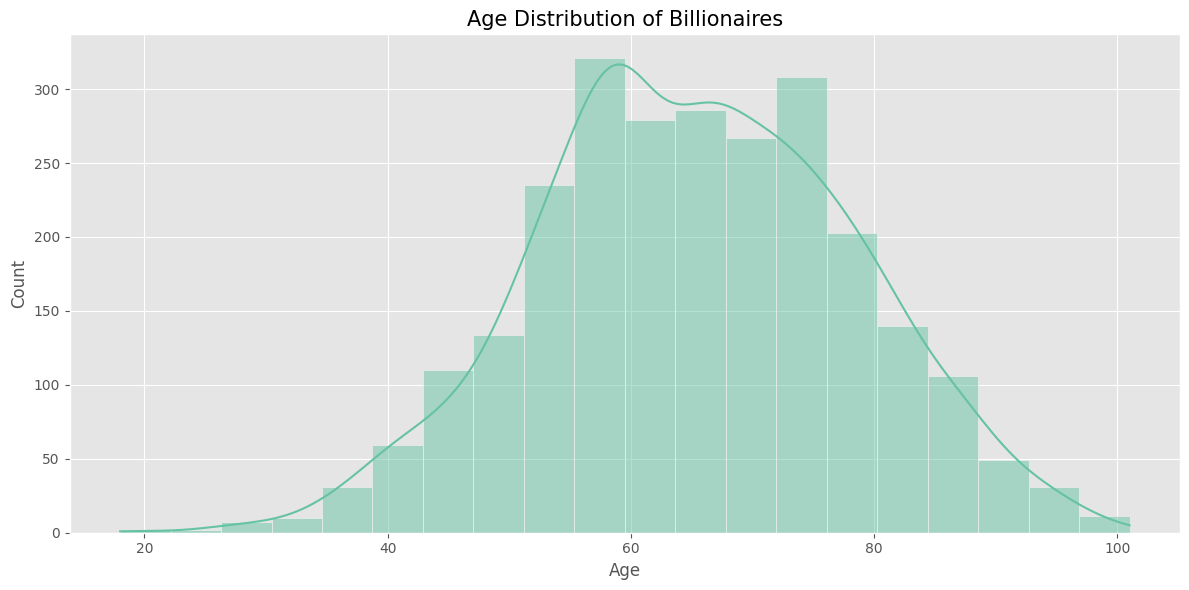


Age statistics:


count    2591.000000
mean       65.252798
std        13.055442
min        18.000000
25%        56.000000
50%        65.000000
75%        75.000000
max       101.000000
Name: age, dtype: float64


Age group distribution:


age_group
51-60       681
61-70       681
71-80       575
over 80     337
41-50       237
31-40        69
Under 30     11
Name: count, dtype: int64

In [10]:
# Gender distribution
plt.figure(figsize=(10, 6))
gender_counts = df['gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution of Billionaires', fontsize=15)
plt.axis('equal')
plt.tight_layout()
plt.show()

print(f"\nGender distribution counts:")
display(gender_counts)

# Age distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='age', bins=20, kde=True)
plt.title('Age Distribution of Billionaires', fontsize=15)
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

print(f"\nAge statistics:")
display(df['age'].describe())

# Create age groups
import sys
import os
sys.path.append(os.path.abspath('..'))
from src.feature_engineering import create_age_groups
df = create_age_groups(df, 'age')

print(f"\nAge group distribution:")
display(df['age_group'].value_counts())